<a href="https://colab.research.google.com/github/Iamsachinpatil/ImageClassfication/blob/main/InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# reshape image
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/cnn dataset for project/train'
valid_path = '/content/drive/MyDrive/cnn dataset for project/val'


In [ ]:
InceptionV3  = InceptionV3(input_shape=IMAGE_SIZE + [3] , weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
#we dont train weights of InceptionV3 layer we already download weights 
for layer in InceptionV3.layers:
    layer.trainable = False

In [ ]:
# to check how many class are present 
folders = glob('/content/drive/MyDrive/cnn dataset for project/train/*')

In [ ]:
# create flatten layer of output InceptionV3
x = Flatten()(InceptionV3.output)

In [ ]:
prediction = Dense(len(folders), activation='ReLU')(x)

# create a model 
model = Model(inputs=InceptionV3.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/cnn dataset for project/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 2297 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/cnn dataset for project/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 995 images belonging to 2 classes.


In [16]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
    )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
72/72 [==============================] - 1084s 15s/step - loss: 7.6204 - accuracy: 0.5842 - val_loss: 7.6761 - val_accuracy: 0.5859
Epoch 2/20
72/72 [==============================] - 59s 825ms/step - loss: 6.9865 - accuracy: 0.5825 - val_loss: 5.3390 - val_accuracy: 0.5859
Epoch 3/20
72/72 [==============================] - 59s 828ms/step - loss: 4.9774 - accuracy: 0.5551 - val_loss: 4.4305 - val_accuracy: 0.5608
Epoch 4/20
72/72 [==============================] - 62s 856ms/step - loss: 4.3259 - accuracy: 0.5616 - val_loss: 4.3613 - val_accuracy: 0.5698
Epoch 5/20
72/72 [==============================] - 60s 831ms/step - loss: 4.2831 - accuracy: 0.5747 - val_loss: 4.5063 - val_accuracy: 0.5859
Epoch 6/20
72/72 [==============================] - 60s 835ms/step - loss: 4.3065 - accuracy: 0.5829 - val_loss: 4.2690 - val_accuracy: 0.5859
Epoch 7/20
72/72 [==============================] - 61s 846ms/step - loss: 4.2931 - accuracy: 0.5821 - val_loss: 4.2690 - val_accuracy: 0.5859

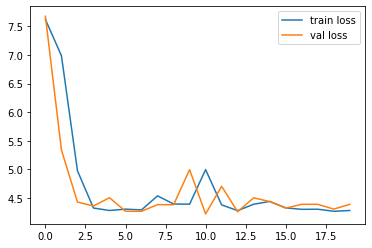

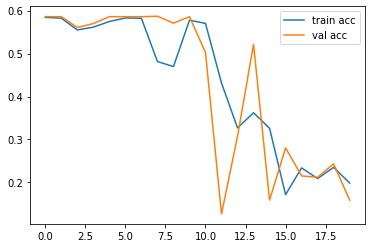

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
from tensorflow.keras.models import load_model

model.save('model_InceptionV3.h5')

In [19]:
y_pred = model.predict(test_set)


In [ ]:
y_pred

In [ ]:
model=load_model('model_InceptionV3.h5')

In [22]:
test_image = image.load_img('/content/drive/MyDrive/cnn dataset for project/test/Converted images01651 (13)(1).jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
img_data=preprocess_input(test_image)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

In [24]:
a=np.argmax(model.predict(img_data), axis=1)

In [25]:
a

array([1])

In [26]:
if(a<0.5):
    print("Non working")
else:
    print("Working")

Working
Working
